# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [380]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

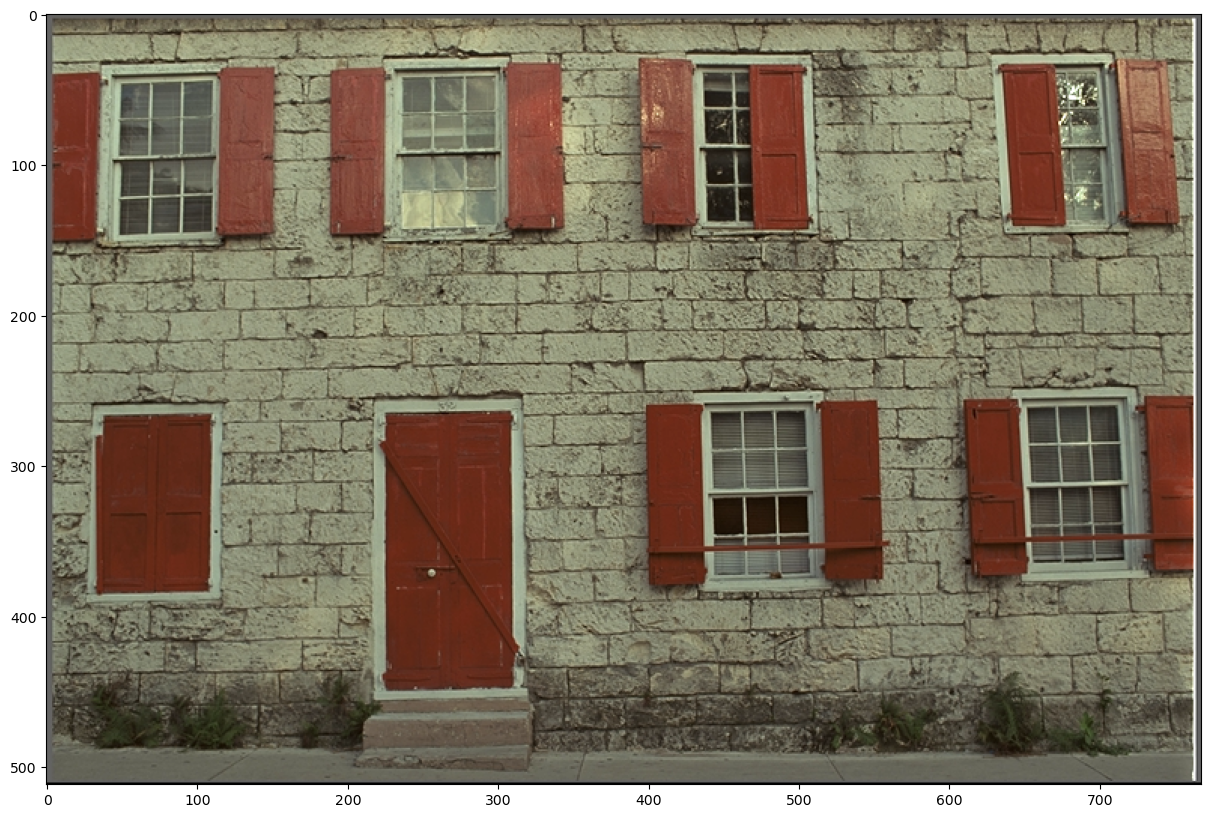

In [381]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

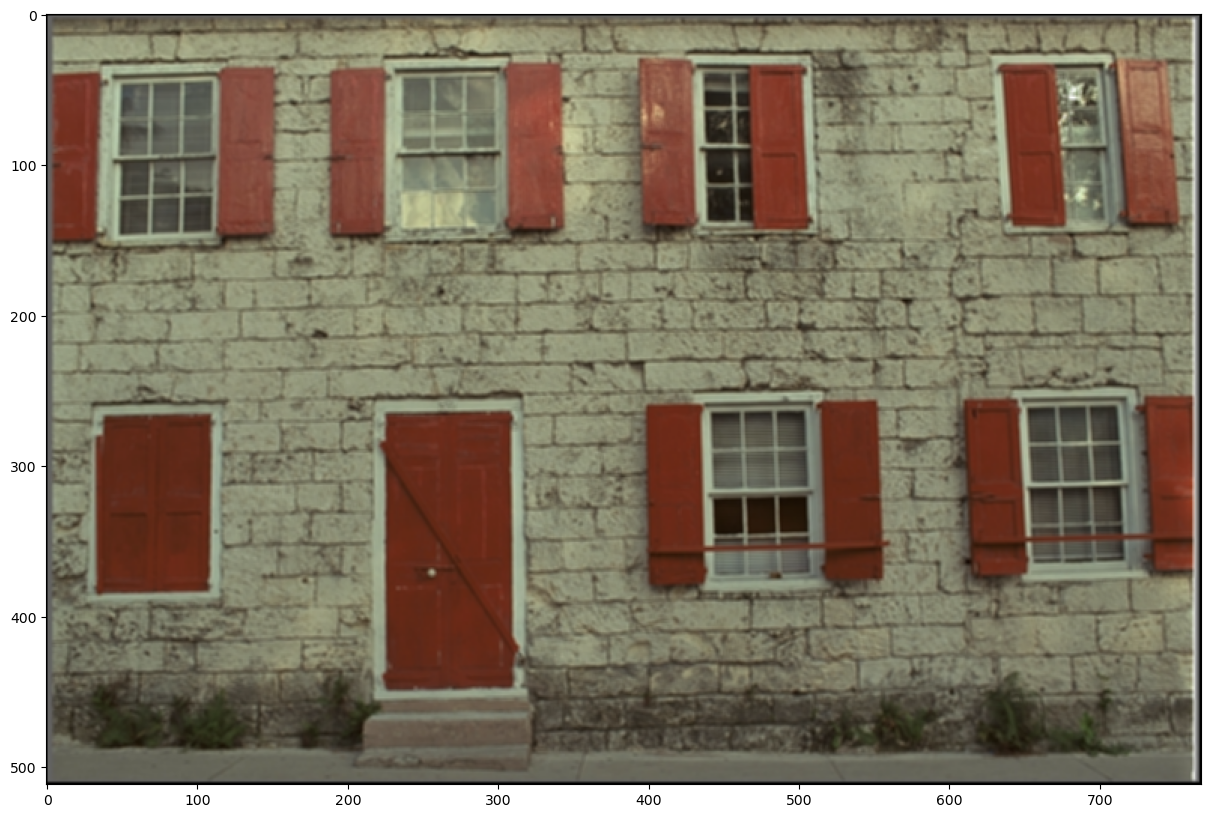

In [144]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
rows, cols, channels = img.shape
unsharp_manual = np.zeros_like(img)

for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        for ch in range(0, channels):
            block = img[r-1:r+2, c-1:c+2, ch]
            unsharp_manual[r, c, ch] = np.sum(block * kernel)
            
plt.imshow(unsharp_manual)

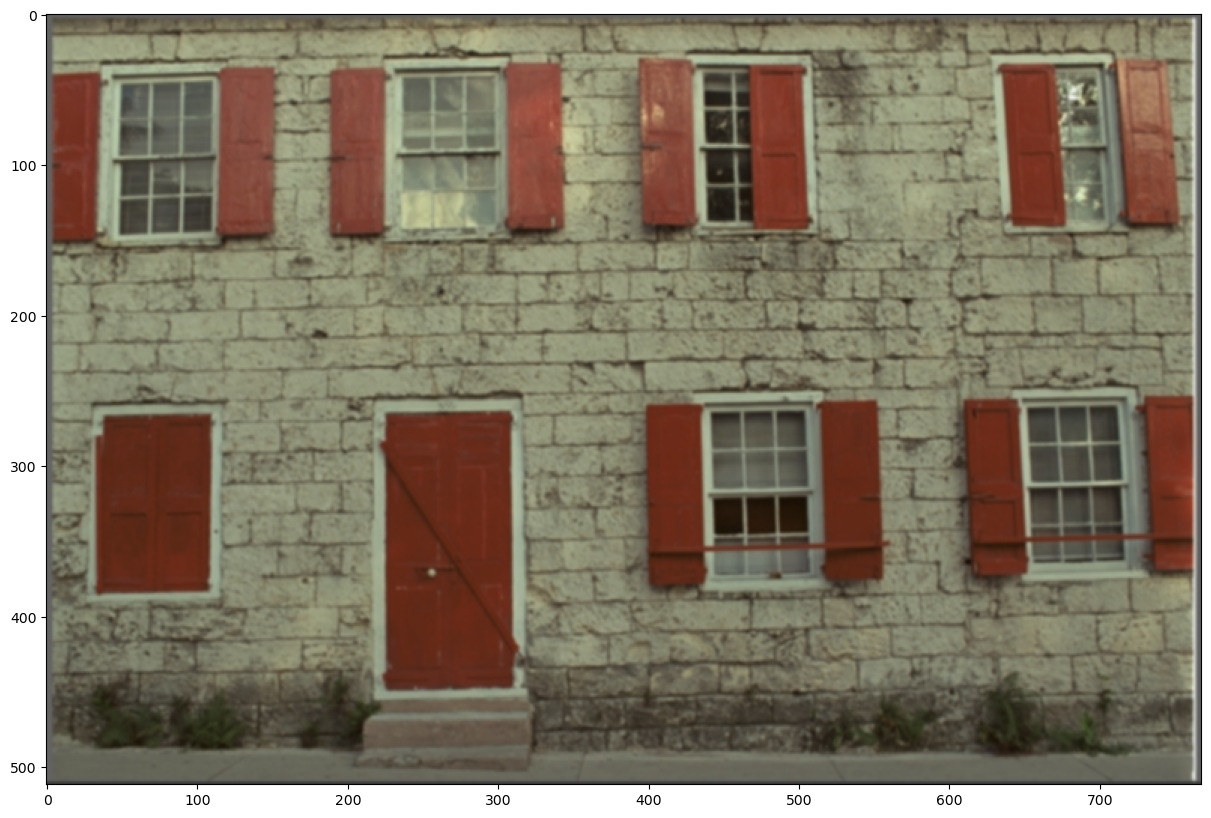

In [382]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0.4)
plt.imshow(unsharp1)

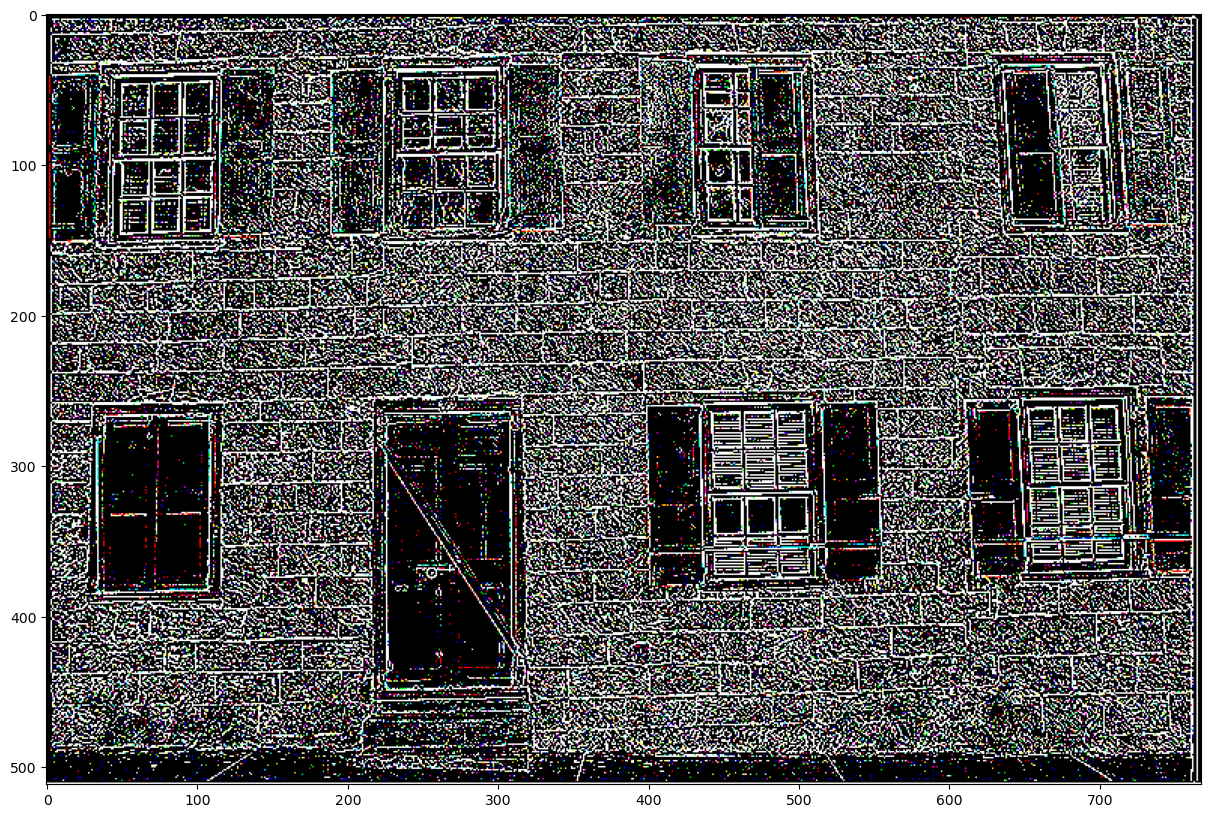

In [363]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = (img - unsharp)
r_channel, g_channel, b_channel = cv2.split(diff)
plt.imshow(diff)

<Figure size 1500x1000 with 0 Axes>

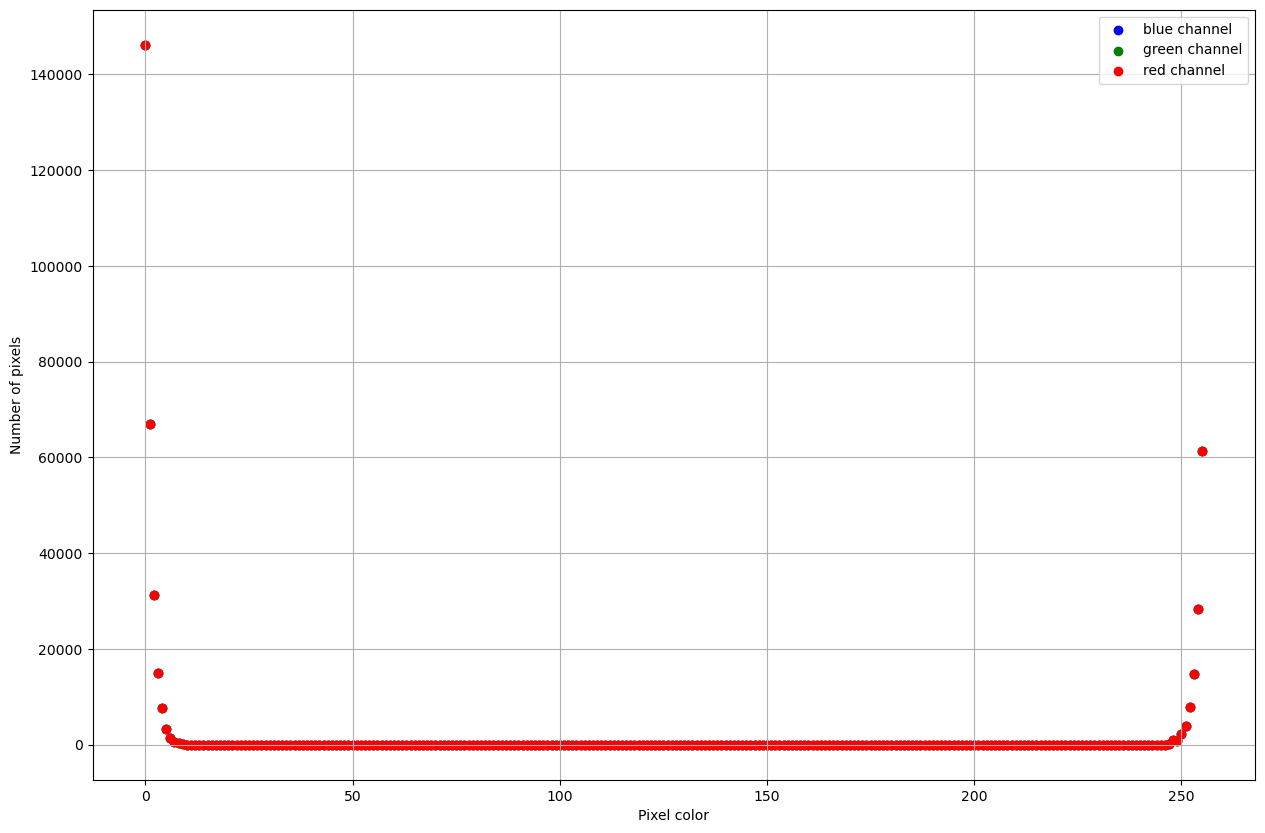

In [383]:
# shows "histogram" by every channel for 'diff'
def calculatePixels(channel):
    rows, cols = channel.shape
    hist = np.zeros(256)
    for r in range(rows):
        for c in range(cols):
            hist[r_channel[r,c]] = hist[r_channel[r,c]] + 1
    return hist

fig = plt.figure()
fig, ax  = plt.subplots()

ax.scatter(np.arange(0, 256), calculatePixels(b_channel), color='blue', label='blue channel')
ax.scatter(np.arange(0, 256), calculatePixels(g_channel), color='green', label='green channel')
ax.scatter(np.arange(0, 256), calculatePixels(r_channel), color='red', label='red channel')
ax.legend()

plt.grid(True)
plt.xlabel('Pixel color'), plt.ylabel('Number of pixels')
plt.show()

(<AxesSubplot:title={'center':'coeff 100'}>,
 Text(0.5, 1.0, 'coeff 100'))

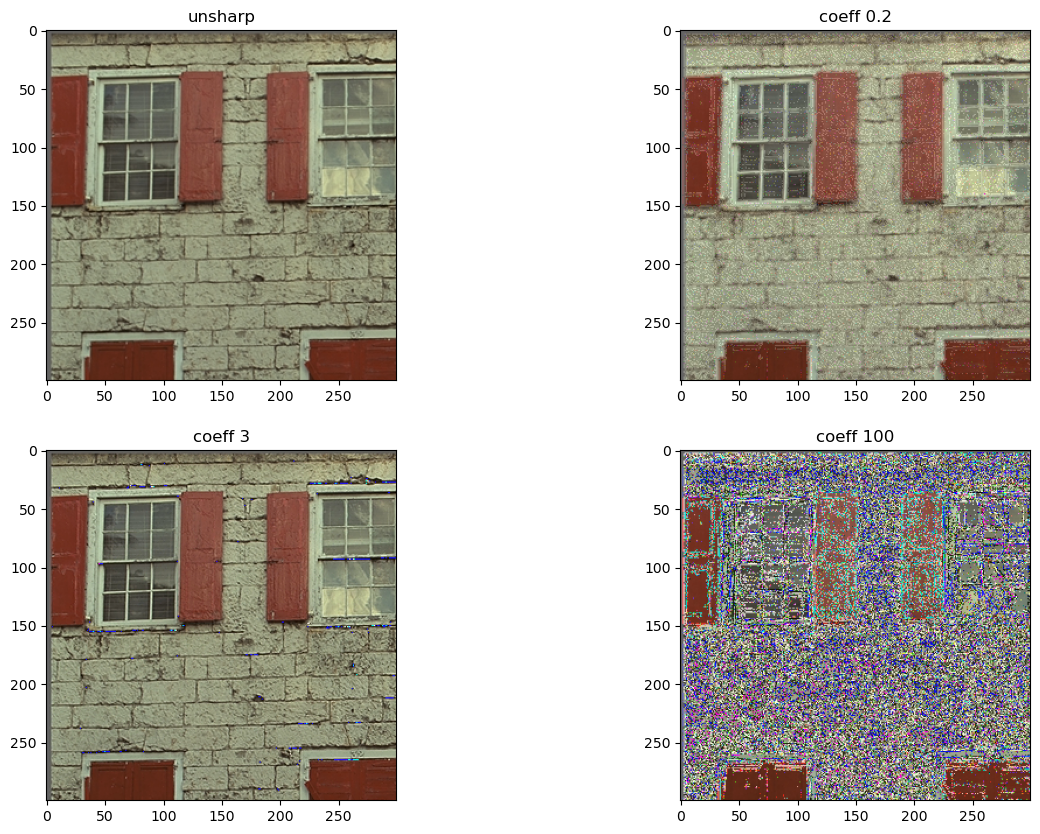

In [384]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
float_coeff = 0.2
sharpened_0_1 = (img + diff*float_coeff).astype(np.uint8)
sharpened_0_1[sharpened_0_1 > 255] = 255
sharpened_0_1[sharpened_0_1 < 0 ] = 0

small_coeff = 3
sharpened_1 = (img + diff*small_coeff)
sharpened_1[sharpened_1 > 255] = 255
sharpened_1[sharpened_1 < 0 ] = 0

large_coeff = 100
sharpened_10 = (img + diff*large_coeff)
sharpened_10[sharpened_10 > 255] = 255
sharpened_10[sharpened_10 < 0 ] = 0

plt.subplot(221), plt.imshow(unsharp[0:300, 0:300, :]), plt.title('unsharp')
plt.subplot(222), plt.imshow(sharpened_0_1[0:300, 0:300, :]), plt.title('coeff ' + str(float_coeff))
plt.subplot(223), plt.imshow(sharpened_1[0:300, 0:300, :]), plt.title('coeff ' + str(small_coeff))
plt.subplot(224), plt.imshow(sharpened_10[0:300, 0:300, :]), plt.title('coeff ' + str(large_coeff))

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

### Answers
* According to observation good values are 1 and more, before aftifacts occure
* According to observation `amount` in 0...1 produces noice
* Large numbers produce artifacts